# Problem set 2: Finding the Walras equilibrium in a multi-agent economy

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/exercises-2020/master?urlpath=lab/tree/PS2/problem_set_2.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

# Tasks

## Drawing random numbers

Replace the missing lines in the code below to get the same output as in the answer.

In [2]:
import numpy as np
np.random.seed(1986)
state = np.random.get_state()
for i in range(3):
    np.random.set_state(state)
    for j in range(2):
        x = np.random.uniform()
        print(f'({i},{j}): x = {x:.3f}')

(0,0): x = 0.569
(0,1): x = 0.077
(1,0): x = 0.569
(1,1): x = 0.077
(2,0): x = 0.569
(2,1): x = 0.077


**Answer:**

See A1.py

## Find the expectated value

Find the expected value and the expected variance

$$ 
\mathbb{E}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} g(x_i)
$$
$$ 
\mathbb{VAR}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} \left( g(x_i) - \frac{1}{N}\sum_{i=1}^{N} g(x_i) \right)^2
$$

where $ x_i \sim \mathcal{N}(0,\sigma) $ and

$$ 
g(x,\omega)=\begin{cases}
x & \text{if }x\in[-\omega,\omega]\\
-\omega & \text{if }x<-\omega\\
\omega & \text{if }x>\omega
\end{cases} 
$$

In [3]:
# a. parameter choices
sigma = 3.14
omega = 2
N = 10000
np.random.seed(1986)

# b. draw random numbers
x = np.random.normal(loc=0, scale=sigma, size=N)

# c. transformation function


def g(x, omega):
    y = x.copy()
    y[x < -omega] = -omega
    y[x > omega] = omega
    return y


# d. mean and variance
mean = np.mean(g(x, omega))
var = np.var(g(x-mean, omega))
print(f'mean = {mean:.5f}, var = {var:.5f}')

mean = -0.00264, var = 2.69804


In [4]:
sigma = 3.14
omega = 2
N = 10000
np.random.seed(1986)
x = np.random.normal(loc=0, scale=sigma, size=N)
print(x)

def g(x):
    if x < -omega:
        return -omega
    elif x > omega:
        return omega
    return x

for i in range(len(x)):
    x[i] = g(x[i])

mean = np.mean(x)
var = np.var(x-mean)
print(f'mean = {mean:.5f}, var = {var:.5f}')

[-2.43971417  0.39756643  2.66503636 ... -1.98283344  2.65278095
 -2.5252548 ]
mean = -0.00264, var = 2.69804


**Answer:**

See A2.py

## Interactive histogram

**First task:** Consider the code below. Fill in the missing lines so the figure is plotted.

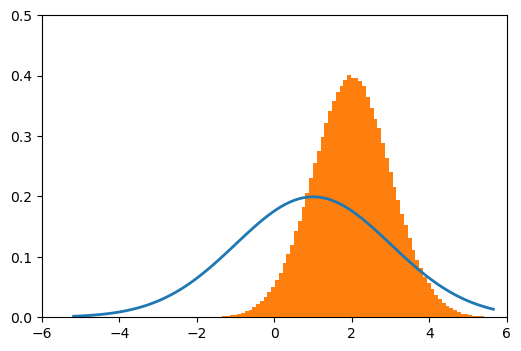

In [5]:
# a. import
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# b. plotting figure
def fitting_normal(X,mu_guess,sigma_guess):
    
    # i. normal distribution from guess
    F = norm(loc=mu_guess,scale=sigma_guess)
    
    # ii. x-values
    x_low = F.ppf(0.001)
    x_high = F.ppf(0.99)
    x = np.linspace(x_low,x_high,100)

    # iii. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,F.pdf(x),lw=2)
    ax.hist(X,bins=100,density=True,histtype='stepfilled');
    ax.set_ylim([0,0.5])
    ax.set_xlim([-6,6])

# c. parameters
mu_true = 2
sigma_true = 1
mu_guess = 1
sigma_guess = 2

# d. random draws
X = np.random.normal(loc=mu_true,scale=sigma_true,size=10**6)

# e. figure
try:
    fitting_normal(X,mu_guess,sigma_guess)
except:
    print('failed')

**Second task:** Create an interactive version of the figure with sliders for $\mu$ and $\sigma$.

In [6]:
# c. parameters
mu_true = 2
sigma_true = 1
mu_guess = 1
sigma_guess = 2

# d. figure
X = np.random.normal(loc=mu_true, scale=sigma_true, size=10**6)
#fitting_normal(X,mu_guess,sigma_guess)

widgets.interact(fitting_normal,
                 X=widgets.fixed(X),
                 mu_guess=widgets.FloatSlider(
                     description="$\mu$", min=0.1, max=5, step=0.05, value=1),
                 sigma_guess=widgets.FloatSlider(
                     description="$\sigma$", min=0.1, max=5, step=0.05, value=1)
)

interactive(children=(FloatSlider(value=1.0, description='$\\mu$', max=5.0, min=0.1, step=0.05), FloatSlider(v…

<function __main__.fitting_normal(X, mu_guess, sigma_guess)>

**Answer:**

See A3.py

## Modules

1. Call the function `myfun` from the module `mymodule` present in this folder.
2. Open VSCode and open the `mymodule.py`, add a new function and call it from this notebook.

In [7]:
import mymodule as mm

mm.myfun(10)

hello world!
hello world!
hello world!
hello world!
hello world!
hello world!
hello world!
hello world!
hello world!
hello world!


**Answer:**

See A4.py

## Git

1. Try to go to your own personal GitHub main page and create a new repository. Then put your solution to this problem set in it.
2. Pair up with a fellow student. Clone each others repositories and run the code in them.

**IMPORTANT:** You will need **git** for the data project in a few needs. Better learn it know. Remember, that the teaching assistants are there to help you.

# Problem

Consider an **exchange economy** with

1. 2 goods, $(x_1,x_2)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with truncated normally *heterogenous* coefficients

    $$
    \begin{aligned}
    u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha_{j}}x_{2}^{1-\alpha_{j}}\\
     & \tilde{\alpha}_{j}\sim\mathcal{N}(\mu,\sigma)\\
     & \alpha_j = \max(\underline{\mu},\min(\overline{\mu},\tilde{\alpha}_{j}))
    \end{aligned}
    $$

4. Endowments are *heterogenous* and given by

    $$
    \begin{aligned}
    \boldsymbol{e}^{j}&=(e_{1}^{j},e_{2}^{j}) \\
     &  & e_i^j \sim f, f(x,\beta_i) =  1/\beta_i \exp(-x/\beta)
    \end{aligned}
    $$

**Problem:** Write a function to solve for the equilibrium.

You can use the following parameters:

In [8]:
# a. parameters
N = 10000
mu = 0.5
sigma = 0.2
mu_low = 0.1
mu_high = 0.9
beta1 = 1.3
beta2 = 2.1
seed = 1986

# b. draws of random numbers
np.random.seed(seed)
alphas = np.random.normal(loc=mu, scale=sigma, size=N)
alphas = np.fmax(np.fmin(alphas, mu_high), mu_low)

# c. demand function
def demand_good_1_func(alpha,p1,p2,e1,e2):
    I = p1 * e1 + p2 * e2
    return alpha*I/p1

# d. excess demand function
def excess_demand_good_1_func(alphas,p1,p2,e1,e2):
    
    # a. demand
    demand = np.sum(demand_good_1_func(alphas,p1,p2,e1,e2))
    
    # b. supply
    supply = np.sum(e1)
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

# e. find equilibrium function
def find_equilibrium(alphas,p1,p2,e1,e2,kappa=0.5,eps=1e-8,maxiter=500):
    t = 0
    while True:
        # a. step 1: excess demand
        Z1 = excess_demand_good_1_func(alphas,p1,p2,e1,e2)
        
        # b: step 2: stop?
        if  np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break    
    
        # c. step 3: update p1
        p1 = p1 + kappa*Z1/alphas.size
            
        # d. step 4: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
            
        t += 1    

    return p1

# f. call find equilibrium function
p1 = 1.4
p2 = 1
kappa = 0.2
eps = 1e-9
e1 = np.random.exponential(beta1, size=N)
e2 = np.random.exponential(beta2, size=N)

12948.961961749157
13977.08858989591


## Save and load

Consider the code below and fill in the missing lines so the code can run without any errors.

In [9]:
import pickle

# a. create some data
my_data = {}
my_data['A'] = {'a': 1, 'b': 2}
my_data['B'] = np.array([1, 2, 3])
my_data['C'] = (1, 4, 2)

my_np_data = {}
my_np_data['D'] = np.array([1, 2, 3])
my_np_data['E'] = np.zeros((5, 8))
my_np_data['F'] = np.ones((7, 3, 8))

# c. save with pickle
with open(f'data.p', 'wb') as f:
    pickle.dump(my_data, f)

# d. save with numpy
np.savez(f'data.npz', **my_np_data)

# a. try
def load_and_print():
    with open(f'data.p', 'rb') as f:
        data = pickle.load(f)
        A = data['A']
        B = data['B']
        C = data['C']

    with np.load(f'data.npz') as data:
        D = data['D']
        E = data['E']
        F = data['F']

    print('variables loaded without error')


try:
    load_and_print()
except:
    print('an error is found')

variables loaded without error


# Extra Problems

## Multiple goods

Solve the main problem extended with multiple goods:

$$
\begin{aligned}
u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha^1_{j}} \cdot x_{2}^{\alpha^2_{j}} \cdots x_{M}^{\alpha^M_{j}}\\
 &  \alpha_j = [\alpha^1_{j},\alpha^2_{j},\dots,\alpha^M_{j}] \\
 &  \log(\alpha_j) \sim \mathcal{N}(0,\Sigma) \\
\end{aligned}
$$

where $\Sigma$ is a valid covariance matrix.

In [114]:
# a. choose parameters
N = 10000
J = 3
seed = 1986

# b. choose Sigma
Sigma_lower = np.array([[1, 0, 0], [0.5, 1, 0], [0.25, -0.5, 1]])
Sigma_upper = Sigma_lower.T
Sigma = Sigma_upper@Sigma_lower

# c. draw random numbers
np.random.seed(seed)
alphas = np.exp(np.random.multivariate_normal(np.zeros(J), Sigma, 10000))

# d. normalize alphas to values between 0 and 1
alpha_sum = alphas.sum(axis=1)
alphas = alphas / alpha_sum[:,None]

betas = np.linspace(1,1.3,J)

# e. choose es, each good is distrubted according to expontential distribution
es = np.empty((N,J))    
for i in range(J):
    es[:,i] = np.random.exponential(betas[i], size=N)

# c. demand function
def demand_good_i_func(alphas,ps,es,i):
    I = np.zeros(N)
    for j in range(3):
        I += ps[j] * es[:,j]
    return alphas[:,i]*I/ps[i]

# d. excess demand function
def excess_demand_good_i_func(alphas,ps,es,i):
    # a. demand
    demand = np.sum(demand_good_i_func(alphas,ps,es,i))
    
    # b. supply
    supply = np.sum(es[:,i])
    
    # c. excess demand
    excess_demand = demand - supply

    return excess_demand

# e. find equilibrium function
def find_equilibrium(alphas,ps,es,kappa=0.5,eps=1e-8,maxiter=500):
    t = 0
    while True:
        # a. step 1: excess demand
        ZS = np.empty(J-1)
        for i in range(J-1):
            ZS[i] = excess_demand_good_i_func(alphas,ps,es,i)
        
        # b: step 2: stop?
        if  np.abs(np.sum(ZS)) < eps or t >= maxiter:
            print(f'{t:3d}: ps = {ps} -> excess demand -> {np.sum(ZS):14.8f}')
            break    
        
        # c. step 3: update ps
        for i in range(J-1):
            ps[i] = ps[i] + kappa*ZS[i]/alphas.shape[0]

        # d. step 4: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: ps = {ps} -> excess demand -> {np.sum(ZS):14.8f}')
            #print(f'{t:3d}: p2 = {ps[1]:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
        t += 1    

    return ps

# f. call find equilibrium function
ps = np.array([2.0,1.5,1])
kappa = 0.2
eps = 1e-8

pss = find_equilibrium(alphas,ps,es,kappa=kappa,eps=eps)

  0: ps = [1.95123001 1.50510779 1.        ] -> excess demand -> -2183.11019992
  1: ps = [1.90492086 1.50743065 1.        ] -> excess demand -> -2199.31438988
  2: ps = [1.86097317 1.50737574 1.        ] -> excess demand -> -2200.12987934
  3: ps = [1.81929116 1.50529088 1.        ] -> excess demand -> -2188.34369978
  4: ps = [1.77978181 1.5014763  1.        ] -> excess demand -> -2166.19623551
   ...
 25: ps = [1.30841384 1.30186209 1.        ] -> excess demand -> -1029.13072407
 50: ps = [1.16239544 1.17613246 1.        ] -> excess demand ->  -241.27069872
 75: ps = [1.13276764 1.14820635 1.        ] -> excess demand ->   -46.29406468
100: ps = [1.12723066 1.14295736 1.        ] -> excess demand ->    -8.48933969
125: ps = [1.12622013 1.14199889 1.        ] -> excess demand ->    -1.54339772
150: ps = [1.12603657 1.14182477 1.        ] -> excess demand ->    -0.28015356
175: ps = [1.12600326 1.14179317 1.        ] -> excess demand ->    -0.05083816
200: ps = [1.12599721 1.14178744 